Task:   Visualize natural groupings or clusters<br>

Tool used: Python, Jupiter notebook<br>

Method: KMean, UMAP, TSNE<br>

Visualisation Process: <br>

Our process is consisting of many steps as mentioned below: 
1. Loading libraries and understanding basic data structure. 
2. Splitting the Data 
3. Normalization 
4. Finding number of clusters using Elbow plot method 
5. K-Means clustering and PCA 
6. Applying U-MAP 7. Applying T-SNE

In [1]:
# Importing Libraries 
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as offline
import plotly
import plotly.figure_factory as ff
import umap # use 'pip install umap-learn' or 'conda install -c conda-forge umap-learn'

> Importing the dataset

In [2]:
signData = pd.read_csv("sign_mnist.csv")
print(signData.head())
print(signData.shape)
print(signData.info())
print(signData.describe())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

>  splitting the dataset into labels and features

In [3]:
features = signData.drop('label', axis = 1) # Features
labels = signData['label'] # Labels
print(type(features))
print(type(labels))
print(features.shape)
print(labels.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(10000, 784)
(10000,)


> Normalization of numerical features using standard scaler

In [4]:
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(features)

> Implementing PCA to visualize dataset

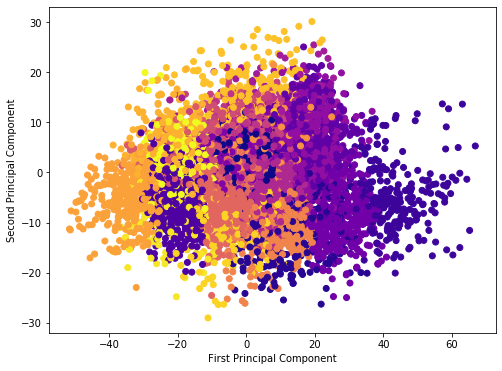

In [5]:
pca = PCA(n_components = 2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
# Implementing K-Means CLustering on dataset and visualizing clusters
kmeans = KMeans(n_clusters = 24)
kmeans.fit(X_scaled)
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans.labels_, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig('k-means')
plt.show()

> Finding the number of clusters (K) - Elbow Plot Method

In [6]:
inertia = []
for i in range(1,25):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

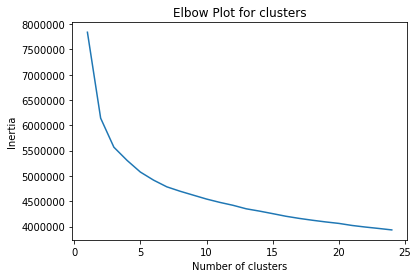

In [7]:
plt.plot(range(1, 25), inertia)
plt.title('Elbow Plot for clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig('k-means- elbow plot')
plt.show()

> Implementing UMPA to visualize dataset

In [8]:
u = umap.UMAP(n_neighbors=12, min_dist=0.5)
fit_x_umap = u.fit_transform(X_scaled)
digits=list(signData['label'])

In [9]:
data_umap = [go.Scatter(x=fit_x_umap[:,0], y=fit_x_umap[:,1], mode='markers',
                    marker = dict(color=labels, colorscale='Rainbow', opacity=0.5),
                                text=[f'digit: {a}' for a in digits],
                                hoverinfo='text')]

In [10]:
layout = go.Layout(title = 'UMAP Visualization', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data_umap, layout=layout)
offline.plot(fig,filename='HandSignals_umap.html')

'HandSignals_umap.html'

> Implementing t-SNE to visualize dataset

In [15]:
tsne = TSNE(n_components = 2, perplexity = 30, n_iter = 1500)
fit_x_tsne = tsne.fit_transform(X_scaled)

In [16]:
data_tsne = [go.Scatter(x=fit_x_tsne[:,0], y=fit_x_tsne[:,1], mode='markers',
                       marker = dict(color=labels, colorscale='Rainbow', opacity=0.5),
                        text=[f'digit: {a}' for a in digits],
                        hoverinfo='text')]

In [17]:
layout = go.Layout(title = 't-SNE Presentation', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data_tsne, layout=layout)

offline.plot(fig,filename='HandSignals _t-SNE.html')

'HandSignals _t-SNE.html'